# Case Study : Telecom Churn Case Study

### Group Members:
>   1. Saroj Kumar Jha
>   2. Gunnam Lakshmi Aditya

### Problem Statement

>In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **customer retention** has now become even more important than customer acquisition.

>For many incumbent operators, retaining high profitable customers is the number one business goal.

>To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.**

>In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Business Goal 

>In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Step to build the model
    


In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 

from math import * # module math

import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization


from scipy import special 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# for pca
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler  # for scaling
from sklearn.decomposition import IncrementalPCA

# for modeling and metrics
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression  #Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

#XgBost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


<ipython-input-1-a453c1b00f38>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge


##  1. Data Preparation

> ### Loading dataset for telecom chrun analysis

In [2]:
#master_data = pd.read_csv('C:/Users/ersar/OneDrive/Desktop/Msc/ML2/Case Study/telecom_churn_data.csv',engine = "python")
master_data = pd.read_csv('telecom_churn_data.csv',engine = "python") #while submit use this else uncomment upper line
master_data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,...,nan,252.00,252.00,252.00,nan,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,nan,212.17,212.17,212.17,nan,0.00,0.00,0.00,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,nan,nan,154.00,50.00,nan,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,nan,nan,28.61,7.60,nan,nan,0.00,0.00,nan,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.00,nan,nan,nan,46.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,nan,nan,nan,2.84,nan,nan,nan,0.00,nan,nan,nan,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,nan,56.00,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


In [3]:
master_data.shape

(99999, 226)

> **The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.**

> **While churn prediction, we are going to assume that there are three phases of customer lifecycle :**
- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

> In this case, since we are working over a four-month window, the first two months are the **‘good’** phase, the third month is the **‘action’** phase, while the fourth month is the **‘churn’** phase.

#### Let's define some user define function to understand data more clearly

In [4]:
def dataoveriew(df):
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
    

In [5]:
def data_stat(df):
    df_new = pd.DataFrame({
                    'Datatype' : df.dtypes.astype(str), 
                    'Non_Null_Count': df.count(axis = 0).astype(int), 
                    'Null_Count': df.isnull().sum().astype(int), 
                    'Null_Percentage': df.isnull().sum()/len(df) * 100, 
                    'Unique_Values_Count': df.nunique().astype(int) 
                     })
    
    return df_new

In [6]:
dataoveriew(master_data)

Rows: 99999

Number of features: 226

Features:
['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og

In [7]:
# Let us first extract list of columns containing recharge amount
recharge_data =  master_data.columns[master_data.columns.str.contains('rech_amt|rech_data')]
print(recharge_data)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


**Analysis:**

> **From above list of feature we can easly derive more meaningful feature like :**
- **Total & Maximum recharge amount**
- **Total & Maximum recharge for data**
- **Last date of Recharging the data**
- **Average recharge amount for data.**


In [8]:
# Now let's check missing percentages value for extracted recharge columns
recharge_data_null_percentage = 100*master_data.loc[:,recharge_data].isnull().sum()/len(master_data)
df = pd.DataFrame(recharge_data_null_percentage)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
print(df)

                              Null_Percentage
total_rech_amt_6                         0.00
total_rech_amt_7                         0.00
total_rech_amt_8                         0.00
total_rech_amt_9                         0.00
max_rech_amt_6                           0.00
max_rech_amt_7                           0.00
max_rech_amt_8                           0.00
max_rech_amt_9                           0.00
date_of_last_rech_data_6                74.85
date_of_last_rech_data_7                74.43
date_of_last_rech_data_8                73.66
date_of_last_rech_data_9                74.08
total_rech_data_6                       74.85
total_rech_data_7                       74.43
total_rech_data_8                       73.66
total_rech_data_9                       74.08
max_rech_data_6                         74.85
max_rech_data_7                         74.43
max_rech_data_8                         73.66
max_rech_data_9                         74.08
av_rech_amt_data_6                

 **Analysis:** We can see in above data some of the column have near about **74%** missing values.

> Let's check distribution of recharge data

In [9]:
master_data.loc[:,recharge_data].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00"
mean,327.51,322.96,324.16,303.35,104.64,104.75,107.73,101.94,2.46,2.67,2.65,2.44,126.39,126.73,125.72,124.94,192.60,200.98,197.53,192.73
std,398.02,408.11,416.54,404.59,120.61,124.52,126.90,125.38,2.79,3.03,3.07,2.52,108.48,109.77,109.44,111.36,192.65,196.79,191.30,188.40
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,1.00
25%,109.00,100.00,90.00,52.00,30.00,30.00,30.00,28.00,1.00,1.00,1.00,1.00,25.00,25.00,25.00,25.00,82.00,92.00,87.00,69.00
50%,230.00,220.00,225.00,200.00,110.00,110.00,98.00,61.00,1.00,1.00,1.00,2.00,145.00,145.00,145.00,145.00,154.00,154.00,154.00,164.00
75%,437.50,428.00,434.50,415.00,120.00,128.00,144.00,144.00,3.00,3.00,3.00,3.00,177.00,177.00,179.00,179.00,252.00,252.00,252.00,252.00
max,"35,190.00","40,335.00","45,320.00","37,235.00","4,010.00","4,010.00","4,449.00","3,399.00",61.00,54.00,60.00,84.00,"1,555.00","1,555.00","1,555.00","1,555.00","7,546.00","4,365.00","4,076.00","4,061.00"


**Analysis:**

>The column having missing value have minimum value as 1, so we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [10]:
master_data['total_rech_data_6'] = master_data['total_rech_data_6'].replace(np.NaN,0.0)
master_data['total_rech_data_7'] = master_data['total_rech_data_7'].replace(np.NaN,0.0)
master_data['total_rech_data_8'] = master_data['total_rech_data_8'].replace(np.NaN,0.0)

master_data['av_rech_amt_data_6'] = master_data['av_rech_amt_data_6'].replace(np.NaN,0.0)
master_data['av_rech_amt_data_7'] = master_data['av_rech_amt_data_7'].replace(np.NaN,0.0)
master_data['av_rech_amt_data_8'] = master_data['av_rech_amt_data_8'].replace(np.NaN,0.0)


> ### 1. Derive new features
> This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models

In [11]:
# let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
master_data['total_rech_amt_data_6'] = master_data['av_rech_amt_data_6'] * master_data['total_rech_data_6']
master_data['total_rech_amt_data_7'] = master_data['av_rech_amt_data_7'] * master_data['total_rech_data_7']
master_data['total_rech_amt_data_8'] = master_data['av_rech_amt_data_8'] * master_data['total_rech_data_8']


In [12]:
master_data['good_phase_total_avg_rech_amnt'] = (master_data.total_rech_amt_6 + master_data.total_rech_amt_data_6 \
                                               + master_data.total_rech_amt_7+ master_data.total_rech_amt_data_7)/2

> ### 2. Filter high-value customers

> - We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

> - After filtering the high-value customers, Accourding to case study instruction we should get about 29.9k rows.

In [13]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 6 & 7 month
high_value_filter = master_data.good_phase_total_avg_rech_amnt.quantile(0.7)

master_data_high_val_cust = master_data[master_data.good_phase_total_avg_rech_amnt > high_value_filter]

In [14]:
master_data_high_val_cust.shape

(29953, 230)

After filtering the high-value customers, we have 29.9k rows.

> ### 3. Tag churners and remove attributes of the churn phase
> Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

> - total_ic_mou_9
> - total_og_mou_9
> - vol_2g_mb_9
> - vol_3g_mb_9

>After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [15]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']


In [16]:
# Checking the Null values are present or Not
df = 100*master_data_high_val_cust.loc[:,high_val_cust_9].isnull().sum()/len(master_data_high_val_cust)
df = pd.DataFrame(df)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
df.head()

,Null_Percentage
total_ic_mou_9,0.00
total_og_mou_9,0.00
vol_2g_mb_9,0.00
vol_3g_mb_9,0.00


In [17]:
# Initially set all the values as 0
master_data_high_val_cust['Churn']= 0

In [18]:
#is_churned :-  (boolean flag for customers where high_val_cust_9 list values are zero)
is_churned = (master_data_high_val_cust.total_ic_mou_9 == 0) & (master_data_high_val_cust.total_og_mou_9 == 0) & \
             (master_data_high_val_cust.vol_2g_mb_9 ==0) & (master_data_high_val_cust.vol_3g_mb_9 ==0)

In [19]:
# set all which having is_churned True condition as 1
master_data_high_val_cust.loc[is_churned,'Churn']=1

In [20]:
# Now Let's drop the column as per specification (all attributes having ‘ _9’, etc. in their names)

churn_columns =  master_data_high_val_cust.columns[master_data_high_val_cust.columns.str.contains('_9')]
# drop all columns corresponding to the churn phase
master_data_high_val_cust.drop(churn_columns,axis=1,inplace=True)

In [21]:
master_data_high_val_cust.shape

(29953, 177)

In [22]:
master_data_high_val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,good_phase_total_avg_rech_amnt,Churn
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,...,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,30.40,0.00,101.20,3.58,252.00,252.00,252.00,559.00,1
7,7000701601,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,802,57.74,19.38,18.74,0.00,0.00,0.00,0.00,"1,185.00",1
8,7001524846,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,...,23.00,nan,2.00,3.00,nan,0.00,0.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,nan,0.00,19.83,nan,0.00,0.00,nan,0.00,0.00,0,1,0,0,1,3,0,0,0,0,0,0,nan,1.00,1.00,315,21.03,910.65,122.16,0.00,0.00,354.00,207.00,696.00,0
21,7002124215,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.00,0.00,0.00,...,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,720,0.00,0.00,0.00,0.00,0.00,0.00,0.00,640.00,0
23,7000887461,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.00,0.00,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,0.00,0.00,0.00,...,179.00,nan,0.00,0.00,nan,2.00,2.00,0.00,356.00,270.00,0.00,0.48,0.01,0.00,599.09,"1,009.92",nan,306.57,197.27,nan,301.78,150.67,nan,0.00,0.00,0,0,0,0,0,0,0,2,1,0,0,1,nan

In [23]:
dataoveriew(master_data_high_val_cust)

Rows: 29953

Number of features: 177

Features:
['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mo

## Modelling

> ### 1. Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

In [24]:
df=pd.DataFrame({'Unique_Values_Count': master_data_high_val_cust.nunique().astype(int) })

In [25]:
print(df)

                                Unique_Values_Count
mobile_number                   29953              
circle_id                       1                  
loc_og_t2o_mou                  1                  
std_og_t2o_mou                  1                  
loc_ic_t2o_mou                  1                  
...                            ..                  
total_rech_amt_data_6           1642               
total_rech_amt_data_7           1746               
total_rech_amt_data_8           1619               
good_phase_total_avg_rech_amnt  5182               
Churn                           2                  

[177 rows x 1 columns]


Dropping above features with only one unique value as they will not add any value to our model building and analyis

In [26]:
print(df[df.Unique_Values_Count==1])

                      Unique_Values_Count
circle_id             1                  
loc_og_t2o_mou        1                  
std_og_t2o_mou        1                  
loc_ic_t2o_mou        1                  
last_date_of_month_6  1                  
last_date_of_month_7  1                  
last_date_of_month_8  1                  
std_og_t2c_mou_6      1                  
std_og_t2c_mou_7      1                  
std_og_t2c_mou_8      1                  
std_ic_t2o_mou_6      1                  
std_ic_t2o_mou_7      1                  
std_ic_t2o_mou_8      1                  


In [27]:
drop_col_with_unique_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [28]:
master_data_high_val_cust.drop(drop_col_with_unique_col,axis=1,inplace=True)

In [29]:
master_data_high_val_cust.shape

(29953, 164)

> #### Check 2G and 3G usage related attributes

In [30]:
usage_2g_and_3g = master_data_high_val_cust.columns[master_data_high_val_cust.columns.str.contains('2g|3g',regex=True)]

In [31]:
#let us check the % of NA values present
var_2g_3g_null_percentage = 100*master_data_high_val_cust.loc[:,usage_2g_and_3g].isnull().sum()/len(master_data_high_val_cust.loc[:,usage_2g_and_3g])
df = pd.DataFrame(var_2g_3g_null_percentage)
df.rename(columns={0:'Null_Percentage'}, inplace=True)
df = pd.DataFrame(df.Null_Percentage)
print(df)

                     Null_Percentage
count_rech_2g_6                44.11
count_rech_2g_7                43.12
count_rech_2g_8                46.80
count_rech_3g_6                44.11
count_rech_3g_7                43.12
count_rech_3g_8                46.80
vol_2g_mb_6                     0.00
vol_2g_mb_7                     0.00
vol_2g_mb_8                     0.00
vol_3g_mb_6                     0.00
vol_3g_mb_7                     0.00
vol_3g_mb_8                     0.00
arpu_3g_6                      44.11
arpu_3g_7                      43.12
arpu_3g_8                      46.80
arpu_2g_6                      44.11
arpu_2g_7                      43.12
arpu_2g_8                      46.80
monthly_2g_6                    0.00
monthly_2g_7                    0.00
monthly_2g_8                    0.00
sachet_2g_6                     0.00
sachet_2g_7                     0.00
sachet_2g_8                     0.00
monthly_3g_6                    0.00
monthly_3g_7                    0.00
m

**Analysis:** 
> We are getting more then **40%** values are not available for count of recharge and average revenue for 2G/3G per user. 
- Although we have 2G/3G volume usage based data available, so we can drop these columns.

In [32]:
master_data_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [33]:
master_data_high_val_cust.shape

(29953, 152)

In [34]:
# let's check Volume based cost 
vbc_column = master_data_high_val_cust.columns[master_data_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [35]:
# To make similarity in Dataset let's Change JUN, July, Aug to 6,7, and 8 of vbc columns to 6,7,8,9 format
master_data_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
master_data_high_val_cust.drop('vbc_3g_9',axis=1,inplace=True)

> #### Let's check minutes of usage - voice calls

In [36]:
mou_cols = master_data_high_val_cust.columns[master_data_high_val_cust.columns.str.contains('mou')]

In [37]:
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [38]:
df = data_stat(master_data_high_val_cust[mou_cols])
df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
df[col_to_display]

,Null_Percentage
isd_ic_mou_8,3.91
loc_ic_t2t_mou_8,3.91
loc_ic_t2m_mou_8,3.91
std_og_t2t_mou_8,3.91
loc_og_t2c_mou_8,3.91
...,...
total_ic_mou_6,0.00
total_ic_mou_7,0.00
total_ic_mou_8,0.00
total_og_mou_6,0.00


**Analysis:** 
> So for all minutes of usage columns the maximum missing % is 3.91 , means in these case the customer has not been used at all for that particular call type, thus we can fill the missing values with zero

In [39]:
# replaceing null values by 0 for minutes of usage variables
master_data_high_val_cust.loc[:,mou_cols] = master_data_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)

> #### Checking columns with more than 40% NA values.

In [40]:
df = data_stat(master_data_high_val_cust)
df = df[df["Null_Percentage"] > 40]
df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
df[col_to_display]

,Null_Percentage
date_of_last_rech_data_8,46.80
max_rech_data_8,46.80
night_pck_user_8,46.80
fb_user_8,46.80
date_of_last_rech_data_6,44.11
max_rech_data_6,44.11
night_pck_user_6,44.11
fb_user_6,44.11
date_of_last_rech_data_7,43.12
max_rech_data_7,43.12


In [41]:
#Dropping 40% column
is_more_40 = df.index
master_data_high_val_cust.drop(master_data_high_val_cust[is_more_40],axis=1,inplace=True)

In [42]:
master_data_high_val_cust.shape

(29953, 139)

> #### Replacing NAN values

In [43]:
df = data_stat(master_data_high_val_cust)
df = df[df["Null_Percentage"] > 0]
df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
df[col_to_display]

,Null_Percentage
og_others_8,3.91
ic_others_8,3.91
date_of_last_rech_8,1.94
og_others_6,1.81
ic_others_6,1.81
og_others_7,1.79
ic_others_7,1.79
date_of_last_rech_7,0.33
date_of_last_rech_6,0.24


> **Exploring/Imputing Numeric field**

In [44]:
numberic_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

> - Replacing NaN values with zero for all numeric data as most of the data is clean and will not impact the analysis

In [45]:
for i in numberic_col:
    master_data_high_val_cust.loc[master_data_high_val_cust[i].isnull(),i]=0

In [46]:
master_data_high_val_cust[df.index].head(3)

,og_others_8,ic_others_8,date_of_last_rech_8,og_others_6,ic_others_6,og_others_7,ic_others_7,date_of_last_rech_7,date_of_last_rech_6
0,0.00,0.00,8/8/2014,0.00,0.00,0.00,0.00,7/16/2014,6/21/2014
7,0.00,15.14,8/26/2014,0.00,15.74,0.00,15.19,7/25/2014,6/27/2014
8,0.00,0.00,8/30/2014,0.00,0.00,0.00,0.00,7/31/2014,6/25/2014


Let's Examine Categorical columns

In [47]:
categorical_df = master_data_high_val_cust.select_dtypes(include='object')


In [48]:
categorical_df

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
21,6/30/2014,7/31/2014,8/31/2014
23,6/18/2014,7/7/2014,8/24/2014
...,...,...,...
99981,6/17/2014,7/25/2014,8/27/2014
99984,6/21/2014,7/31/2014,8/27/2014
99986,6/20/2014,7/28/2014,8/18/2014
99988,6/30/2014,7/28/2014,8/29/2014


We can see all the date columns are listed as object let's change it into datatime

In [49]:
date_columns=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
for col in date_columns:
    master_data_high_val_cust[col] = pd.to_datetime(master_data_high_val_cust[col])

In [50]:
master_data_high_val_cust[date_columns].head(5)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
21,2014-06-30,2014-07-31,2014-08-31
23,2014-06-18,2014-07-07,2014-08-24


In [51]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
master_data_high_val_cust.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,...,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,good_phase_total_avg_rech_amnt,Churn
count,"29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00",...,"29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00","29,953.00"
mean,"7,001,206,086.45",558.82,561.16,508.89,260.90,268.05,234.35,373.80,378.23,335.12,16.12,12.65,12.51,26.60,20.16,19.89,84.57,85.76,78.15,163.31,163.09,151.81,6.35,6.43,5.89,1.58,1.89,1.70,254.24,255.29,235.86,165.90,174.38,148.59,179.44,187.96,157.32,1.81,1.83,1.59,347.15,364.17,307.50,2.17,2.11,1.95,5.83,7.11,6.55,0.66,...,11.89,11.02,1.16,1.50,1.23,11.85,11.72,9.98,661.13,660.93,584.71,169.35,172.28,160.22,100.93,100.38,92.44,1.67,1.86,1.62,130.78,139.92,122.21,126.52,125.11,105.87,344.66,370.54,351.83,0.17,0.18,0.15,1.07,1.22,1.06,0.22,0.23,0.21,0.21,0.23,0.20,"1,209.28",169.28,179.06,158.73,456.39,528.96,463.64,"1,153.70",0.08
std,"690,810.17",460.87,480.03,502.14,459.85,480.30,458.75,482.71,499.14,481.99,76.34,75.83,74.18,116.27,96.13,104.80,228.96,240.70,227.54,250.22,241.68,233.75,22.14,21.96,19.52,6.31,9.14,7.15,378.55,375.62,363.55,403.99,421.47,397.84,409.14,433.81,409.04,11.99,12.99,10.94,608.85,640.13,609.11,45.89,45.58,44.75,17.58,21.77,20.29,4.11,...,80.24,70.66,14.00,16.01,12.79,9.43,9.43,9.28,561.33,582.75,611.47,175.42,181.50,173.30,143.82,141.00,145.25,2.83,3.09,3.00,200.43,206.92,195.65,330.33,331.51,313.06,914.36,916.08,919.53,0.44,0.45,0.41,2.51,2.74,2.54,0.61,0.66,0.62,0.99,1.09,1.10,957.45,421.13,443.76,416.99,"1,419.71","1,477.10","1,623.84","1,359.53",0.27
min,"7,000,000,074.00","-2,

> ### 2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

**As we can see the Most of the attributes have column family that is spread to all three month[6,7,8] i.e. Column Family + _Month No, So we can use one common fuction to draw graphical representation of these column.**

In [52]:
# Let's create common function to draw chart for  6th, 7th and 8th month 
# As we know column name is somthing like column family +'_month number'
def box_chart(col):
    plt.figure(figsize=(20,16))
    df = master_data_high_val_cust
    plt.subplot(2,3,1)
    # 6th month columns
    sns.boxplot(data=df, y=col+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
     # 7th month columns
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=col+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
     # 8th month columns
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=col+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.show()
    
 

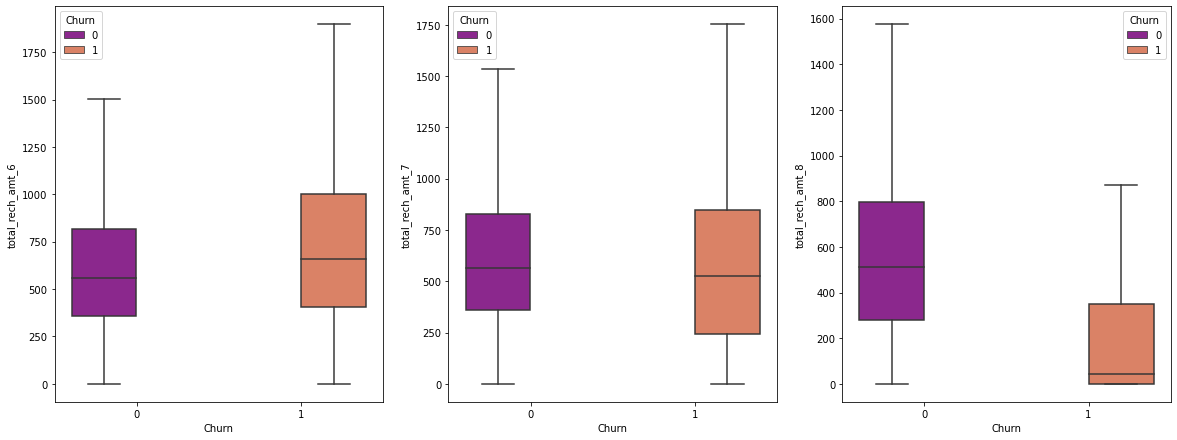

In [53]:
# Ploting for total recharge amount:
box_chart('total_rech_amt')

**Analysis:** 
  > We can see a drop in the total recharge amount for churned customers in the Action Phase [ 8th Month ].

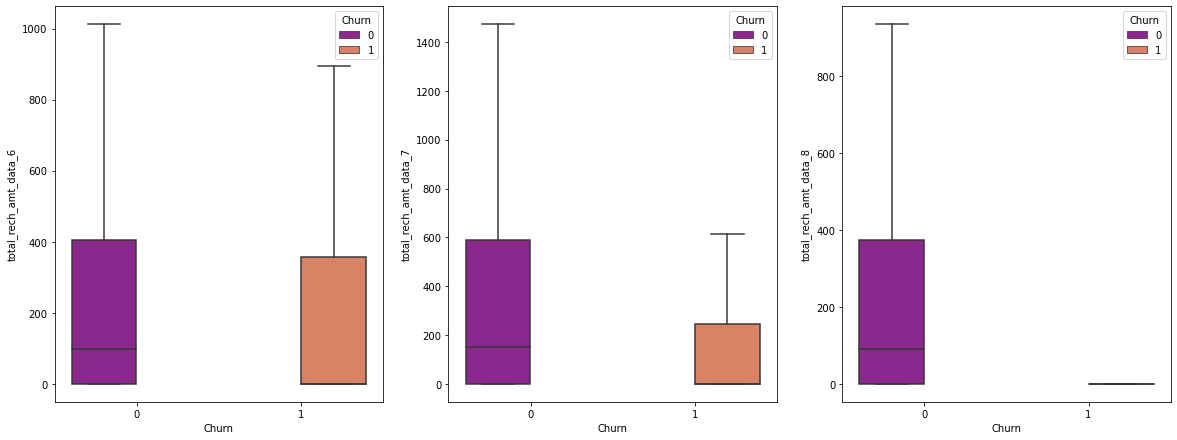

In [54]:
# Ploting for total recharge amount for data:
box_chart('total_rech_amt_data')

**Analysis:** 
  > Here we can see a huge drop in the total recharge amount data for churned customers in the Action Phase [ 8th Month ].

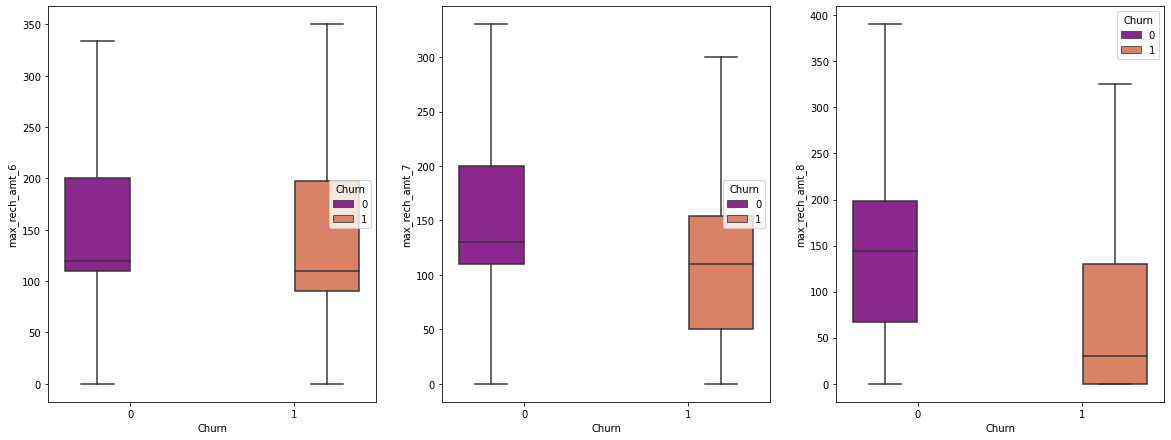

In [55]:
# Ploting for maximum recharge amount for data:
box_chart('max_rech_amt')

**Analysis:** 
  > Same pattern of droping for churned customers in the Action Phase [ 8th Month ].

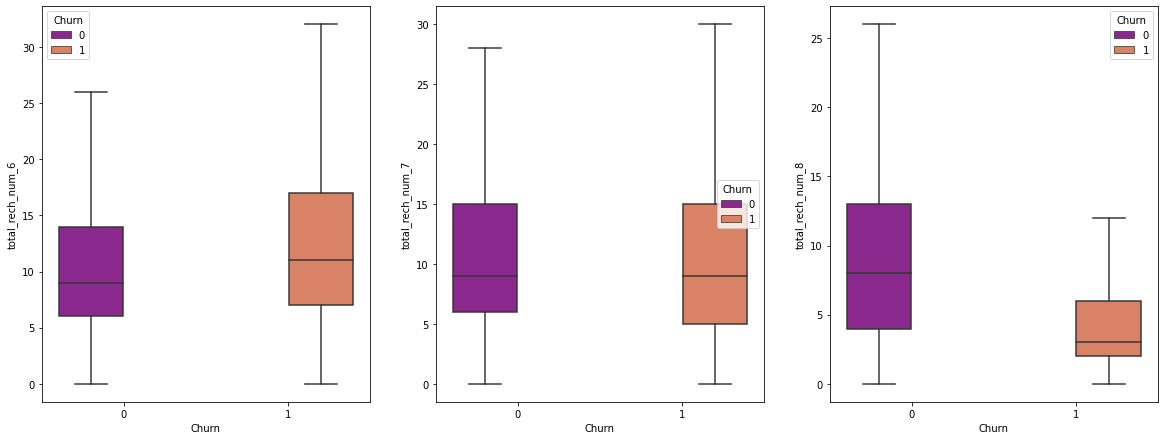

In [56]:
# Ploting for Total recharge for Number:
box_chart('total_rech_num')

**Analysis:** 
  > Again we have huge droping for churned customers in the Action Phase [ 8th Month ].

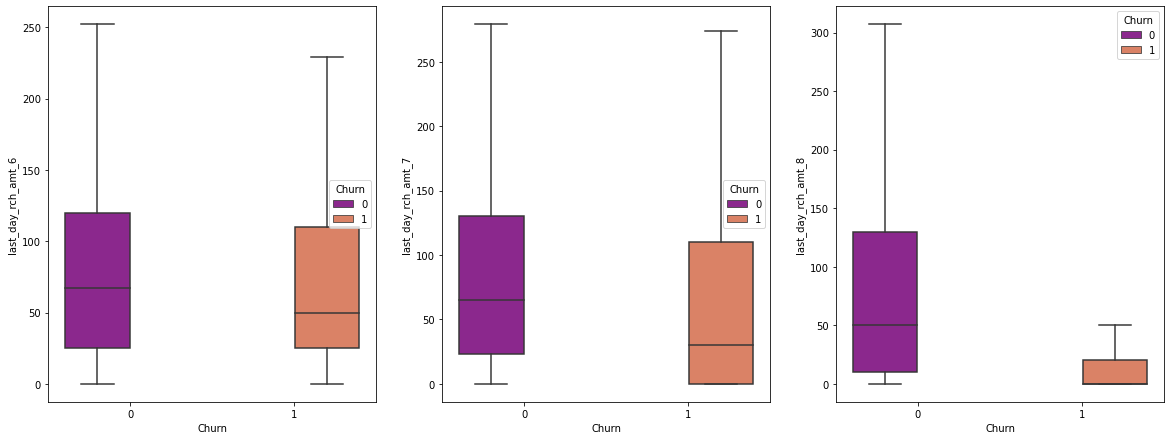

In [57]:
# Ploting for last day recharge amount:
box_chart('last_day_rch_amt')

**Analysis:** 
  > Here also we have huge droping for churned customers in the Action Phase [ 8th Month ].

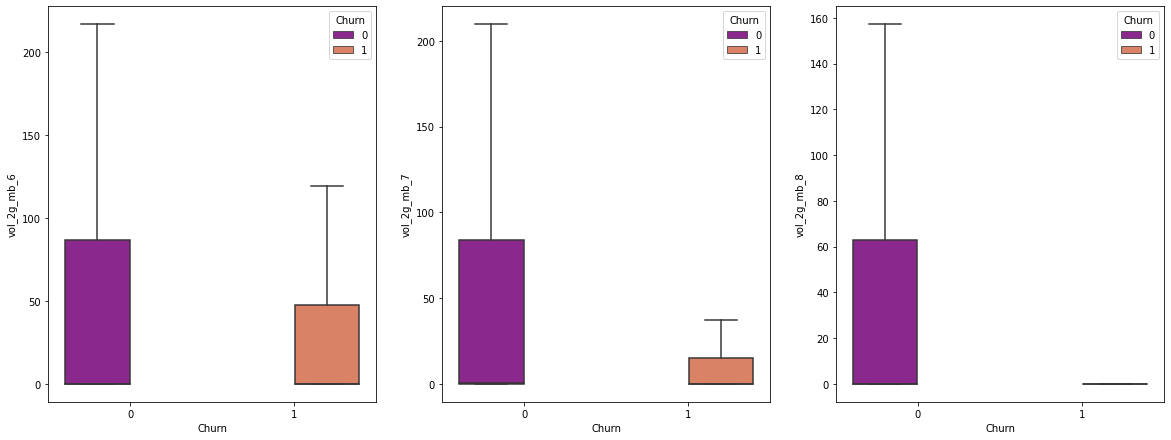

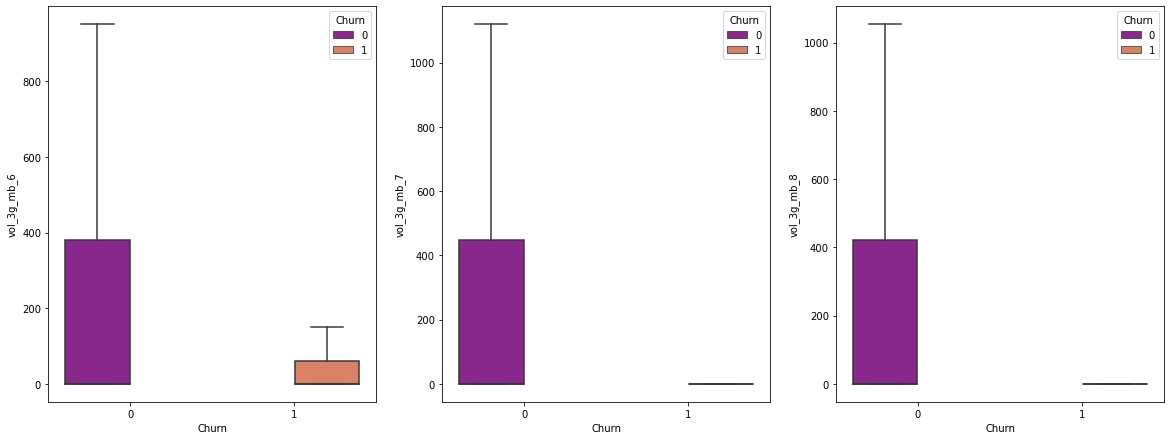

In [58]:
# Ploting for volume of 2G and 3G usage columns:
box_chart('vol_2g_mb')
box_chart('vol_3g_mb')

**Analysis:** 
>We have two observations from above:
-  2G and 3G usage for churned customers drops in 8th month
- We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

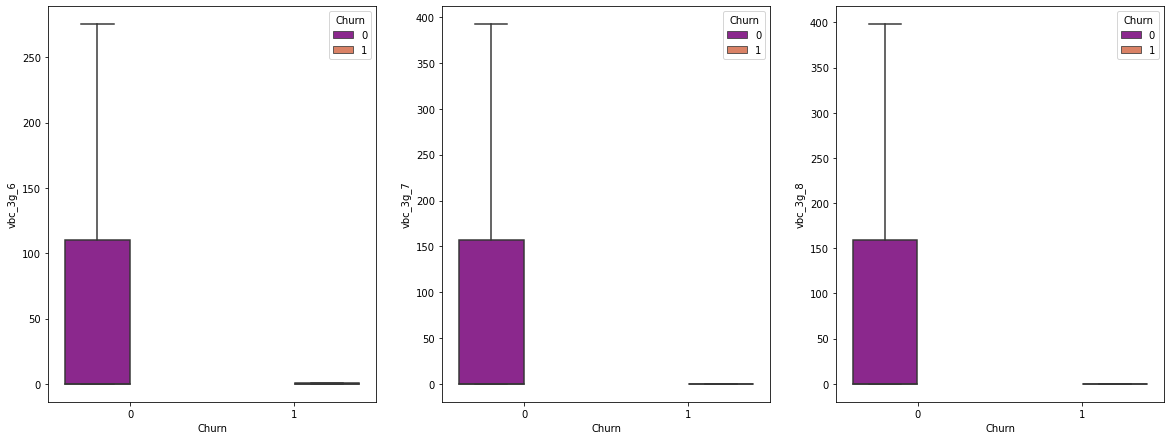

In [59]:
# Ploting for volume based cost :
box_chart('vbc_3g')

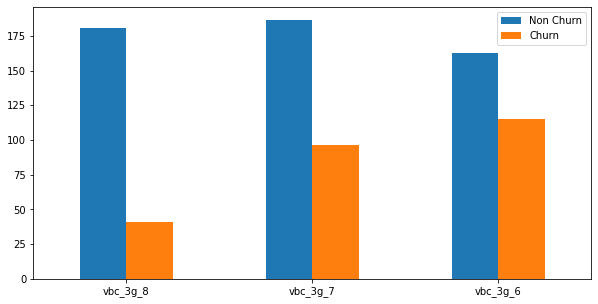

In [60]:
col_lst=['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']
df_0 = master_data_high_val_cust[master_data_high_val_cust.Churn==0].filter(col_lst)
df_1 = master_data_high_val_cust[master_data_high_val_cust.Churn==1].filter(col_lst)

mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

frames = [mean_df_0, mean_df_1]
mean_bar = pd.concat(frames)

mean_bar.T.plot.bar(figsize=(10,5),rot=0)
plt.show()

**Analysis:** 
> Significantly it showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

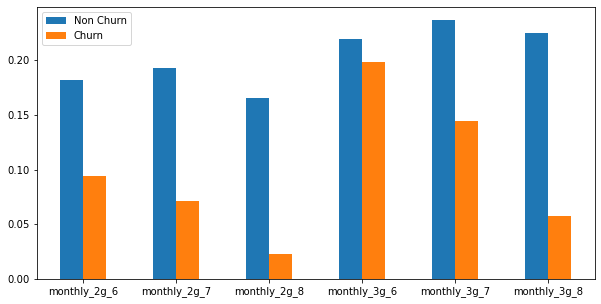

In [61]:
# Ploting for monthly subscription :
col_lst=['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
df_0 = master_data_high_val_cust[master_data_high_val_cust.Churn==0].filter(col_lst)
df_1 = master_data_high_val_cust[master_data_high_val_cust.Churn==1].filter(col_lst)

mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

frames = [mean_df_0, mean_df_1]
mean_bar = pd.concat(frames)

mean_bar.T.plot.bar(figsize=(10,5),rot=0)
plt.show()


**Analysis:** 
  > Here also we have huge droping for churned customers in the Action Phase [ 8th Month ].

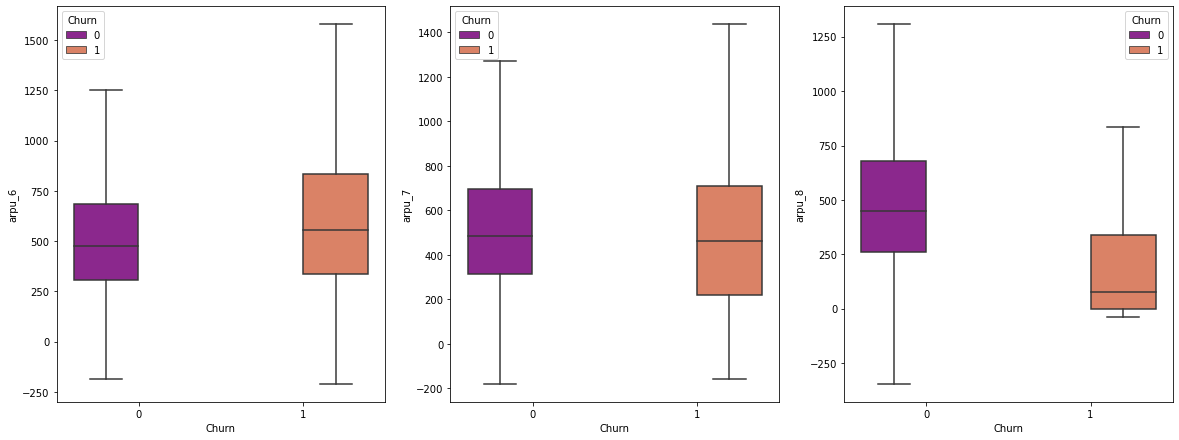

In [62]:
# Plotting Average Revenue Per User [arpu]
box_chart('arpu')

**Analysis:** 
>We can see that huge drops for Average Revenue Per User in 8th month for churned customers

>### Let's analys Tenure  for Customers  

>  aon --> Age on network 

In [63]:
tenure_analysis_data = master_data_high_val_cust.copy()

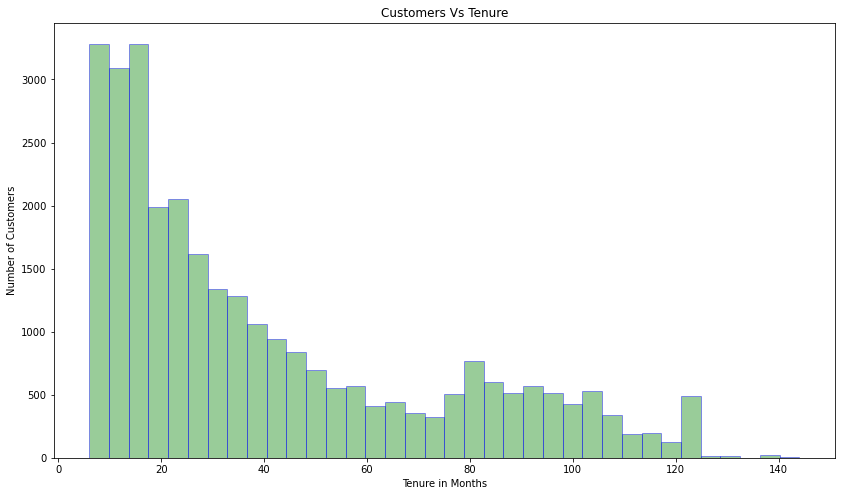

In [64]:
plt.figure(figsize=(14,8))
tenure_analysis_data['tenure'] = tenure_analysis_data['aon']/30   # number of days the customer is using the  network
tenure_analysis_data['tenure'].head()
ax = sns.distplot(tenure_analysis_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 8})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [65]:
tenure_range = [0, 6, 12, 24,48, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Years', '2-4 Years','4-5 Years', '5 Years and above']
tenure_analysis_data['tenure_range'] = pd.cut(tenure_analysis_data['tenure'], tenure_range, labels=tenure_label)
tenure_analysis_data['tenure_range'].head()

0     2-4 Years  
7     2-4 Years  
8     6-12 Months
21    1-2 Years  
23    1-2 Years  
Name: tenure_range, dtype: category
Categories (6, object): [0-6 Months < 6-12 Months < 1-2 Years < 2-4 Years < 4-5 Years < 5 Years and above]

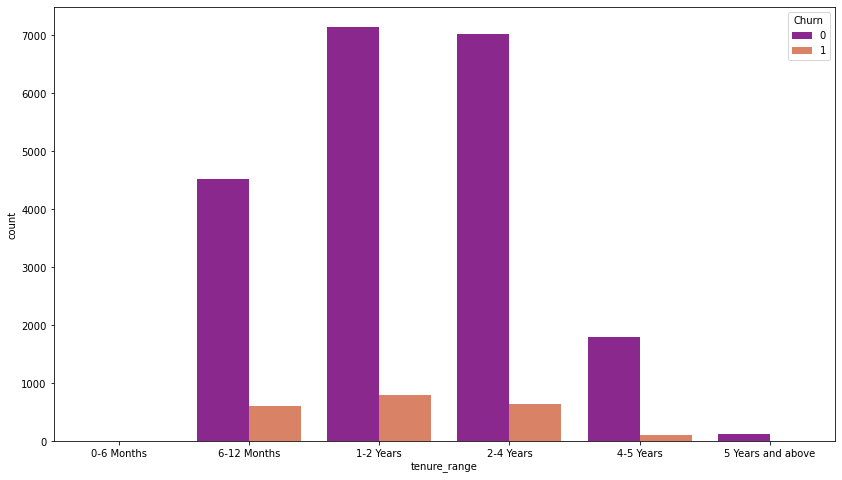

In [66]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'Churn',data = tenure_analysis_data,palette=("plasma"))
plt.show()

** Analysis **
> Customers with less than **4 years** of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.

> #### Drawing of heat map for cor matrtix taking too much time and due to more col it is hard to read observation


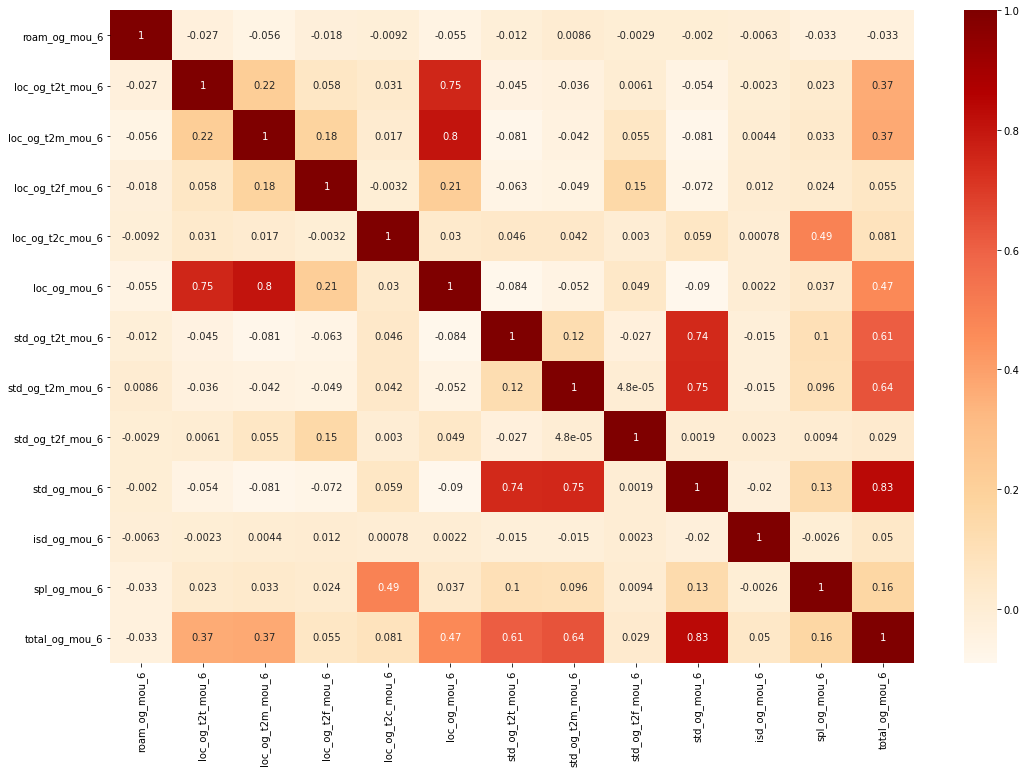

In [67]:
#Let's see for outgoing call and Minutes of usage - voice calls
mou_og_cols6 = master_data_high_val_cust.columns[master_data_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]
plt.figure(figsize=(18,12))
sns.heatmap(master_data_high_val_cust.filter(mou_og_cols6).corr(),cmap="OrRd",annot=True)
plt.show()


In [68]:
print(master_data_high_val_cust.loc[8,'total_og_mou_6'],"==",master_data_high_val_cust.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6']].sum())
print(master_data_high_val_cust.loc[8,'std_og_mou_6'],"==",master_data_high_val_cust.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6']].sum())
print(master_data_high_val_cust.loc[8,'loc_og_mou_6'],"==",master_data_high_val_cust.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6']].sum())

508.36 == 508.34999999999997
130.26 == 130.25
378.09 == 378.09


**Analysis:**
> We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [69]:
list_total_og_cols = master_data_high_val_cust.columns[master_data_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
master_data_high_val_cust.drop(list_total_og_cols,axis=1,inplace=True)
print(list_total_og_cols)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


 **Checking for incoming Minutes of usage variables**

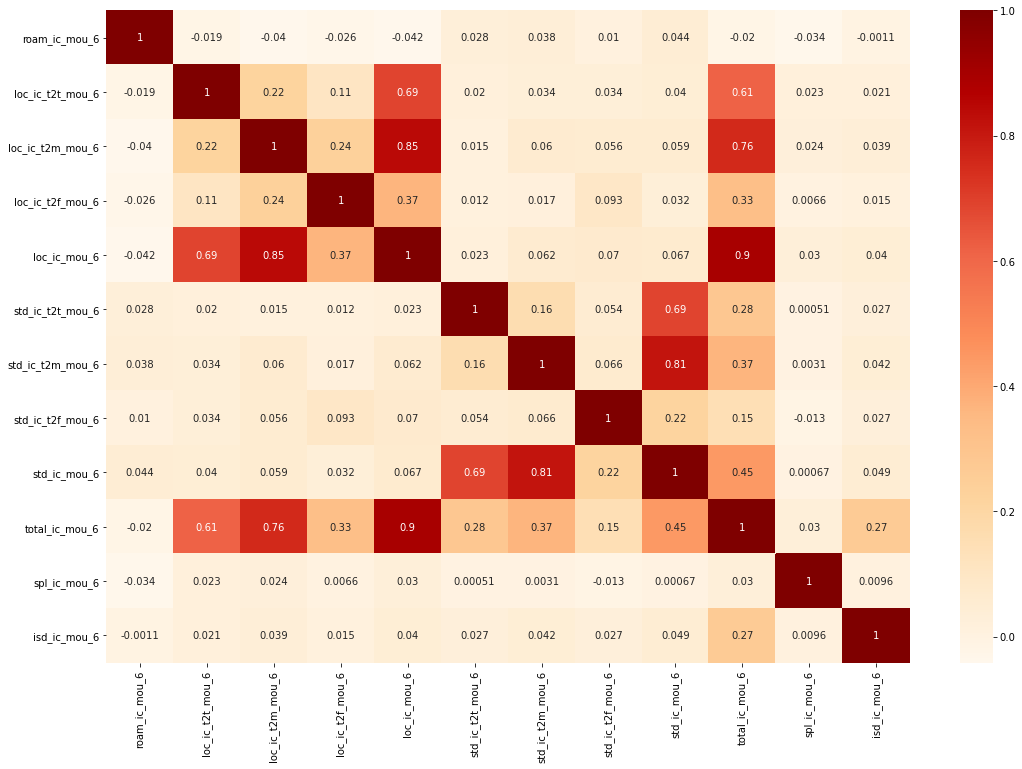

In [70]:
mou_ic_cols6 = master_data_high_val_cust.columns[master_data_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
plt.figure(figsize=(18,12))
sns.heatmap(master_data_high_val_cust.filter(mou_ic_cols6).corr(),cmap="OrRd",annot=True)
plt.show()


In [71]:
print(master_data_high_val_cust.loc[21,'total_ic_mou_6'],"==",master_data_high_val_cust.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(master_data_high_val_cust.loc[21,'loc_ic_mou_6'],"==",master_data_high_val_cust.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())
print(master_data_high_val_cust.loc[21,'std_ic_mou_6'],"==",master_data_high_val_cust.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())

207.09 == 207.09
125.33 == 125.32000000000001
81.76 == 81.75


**Analysis:** 
> Same in case of incomming, We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [72]:
list_total_ic_cols = master_data_high_val_cust.columns[master_data_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
master_data_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)
list_total_ic_cols.tolist()

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

>#### 3. Derive new features.

In [73]:
final_data = master_data_high_val_cust.copy()
print(final_data.shape)
final_data.head(3)

(29953, 121)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,good_phase_total_avg_rech_amnt,Churn
0,7000842753,197.38,214.82,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,...,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.00,252.00,252.00,559.00,1
7,7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,58.14,32.26,27.31,217.56,...,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,0.00,"1,185.00",1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,23.84,9.84,0.31,57.58,...,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.00,2.00,3.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,354.00,207.00,696.00,0


In [74]:
final_data.drop(master_data_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (final_data.shape)

(29953, 118)


In [75]:
col_list = final_data.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    final_data[avg_col_name] = (final_data[col_6]  + final_data[col_7])/ 2


arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [76]:
col_list_to_drop = final_data.filter(regex='_6|_7')
final_data.drop(col_list_to_drop,axis=1,inplace=True)
print (final_data.shape)

(29953, 80)


In [77]:
final_data.head(3)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,good_phase_total_avg_rech_amnt,Churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,1.00,252.00,5.75,109.61,0,0,1,0,968,30.40,252.00,559.00,1,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,307.00,252.00,252.00,1.00,252.00,15.72,117.16,0.00,0.00,1.00,0.00,50.60,252.00
7,7000701601,"3,171.48",52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,0.00,"1,185.00",1,"1,209.51",56.26,510.29,24.86,18.16,41.38,378.00,58.64,0.00,13.79,40.83,13.37,0.09,2.25,0.00,45.20,219.53,126.81,24.36,109.22,43.22,0.10,8.29,15.46,5.00,"1,185.00","1,185.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,0.00
8,7001524846,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,3.00,69.00,0.03,11.94,0,3,0,0,315,21.03,207.00,696.00,0,435.47,382.36,87.64,0.00,0.00,257.36,75.77,0.00,0.00,125.00,11.86,0.00,0.00,0.00,0.00,16.84,35.78,0.00,0.29,13.25,0.00,0.00,0.00,0.00,20.00,519.00,122.00,25.00,1.00,88.50,178.00,375.48,0.50,0.50,0.00,0.00,516.40,177.00


**Analysis:** 
> We have merged all most all columns related to month 6 & 7 so to reduce the number of features. By doing this apporach we have reduced the fetures from 118 to 80.  

# Modelling

## PCA : Principal Component Analysis

In [78]:
final_data_pca = final_data.copy()

In [79]:

def split_dataset(df):
    Y = df["Churn"]
    X = df.drop(["Churn","mobile_number"],axis=1)
    return X,Y
    
def scale_dataset(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    return X_scale_final

def scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=100)
    pca.fit(X)
    fig = plt.figure(figsize = [12,8])
    plt.vlines(x=48, ymax=1, ymin=0, colors="r", linestyles="--")
    plt.hlines(y=0.95, xmax=60, xmin=0, colors="g", linestyles="--")
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca



    
def resampling_dataset(X,Y,feature_number,train_size=0.7,test_size=0.3) :
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=1)
  
    print("Shape of train datatset before : {0} ".format(x_train.shape))
    print("Percenatge of Churned customer data : {0} " .format(str(round(100*Y.sum()/len(Y),2))))
    print("Applying SMOTE to normalize imbalance ....")

    #Initializing SMOTE: Synthetic Minority Over-sampling Technique
    # using this as data is skewed 
    smote = SMOTE()
    x_tr,y_tr = smote.fit_sample(x_train,y_train)
    print("Shape of train datatset after SMOTE :  {0}".format(str(x_tr.shape)) )
   
    # Applying PCA : Pricnipal Component Analysis
    pca = IncrementalPCA(n_components=feature_number)    
    x_tr_pca = pca.fit_transform(x_tr)
    x_test_pca = pca.transform(x_test)
    print("Shape of train datatset after PCA : {0} ".format(str(x_tr_pca.shape)))
  
    return x_tr_pca,x_test_pca,y_tr,y_test



In [80]:
X,Y=split_dataset(final_data_pca)

In [81]:
X.head(2)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,good_phase_total_avg_rech_amnt,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,1.00,252.00,5.75,109.61,0,0,1,0,968,30.40,252.00,559.00,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,307.00,252.00,252.00,1.00,252.00,15.72,117.16,0.00,0.00,1.00,0.00,50.60,252.00
7,"3,171.48",52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,0.00,"1,185.00","1,209.51",56.26,510.29,24.86,18.16,41.38,378.00,58.64,0.00,13.79,40.83,13.37,0.09,2.25,0.00,45.20,219.53,126.81,24.36,109.22,43.22,0.10,8.29,15.46,5.00,"1,185.00","1,185.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,0.00


In [82]:
Y.head(2)

0    1
7    1
Name: Churn, dtype: int64

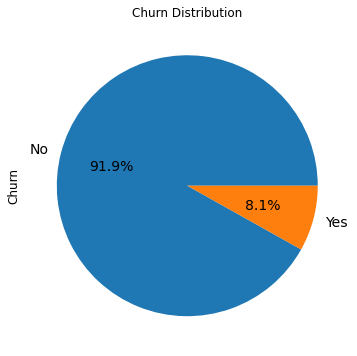

In [83]:
#Churn Distribution
pie_chart = final_data_pca['Churn'].value_counts()*100.0 /len(final_data_pca)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

> #### Scale data

In [84]:

X_scaled = scale_dataset(X)
print(X_scaled.shape)
X_scaled.head(5)

(29953, 78)


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,good_phase_total_avg_rech_amnt,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,-0.59,-0.51,-0.70,-0.17,-0.19,-0.34,-0.65,-0.30,-0.24,-0.37,-0.38,-0.15,-0.04,-0.32,-0.02,-0.39,-0.66,-0.31,-0.19,-0.27,-0.13,-0.24,-0.16,-0.10,-0.86,-0.54,0.53,1.10,-0.21,0.66,-0.32,-0.26,-0.38,-0.42,1.28,-0.18,-0.25,-0.33,-0.13,-0.44,-0.82,-0.60,-0.82,-0.22,-0.25,-0.38,-0.70,-0.30,-0.27,-0.44,-0.47,-0.16,-0.05,-0.37,-0.14,-0.42,-0.73,-0.35,-0.20,-0.32,-0.15,-0.27,-0.15,-0.10,-0.96,-0.69,0.53,1.30,-0.28,0.64,-0.37,-0.29,-0.46,-0.47,1.36,-0.23,-0.30,-0.19
1,5.30,-0.40,-0.02,0.26,0.17,-0.17,0.04,2.43,-0.24,-0.34,-0.26,1.38,0.18,-0.00,-0.02,-0.22,-0.12,0.58,0.23,1.10,0.99,-0.24,0.29,1.09,-0.32,4.99,8.19,4.73,-0.54,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.43,-0.26,-0.29,0.02,1.51,-0.47,0.29,0.16,-0.06,-0.20,0.92,2.49,-0.27,-0.41,-0.36,1.00,-0.05,-0.24,-0.14,-0.13,0.33,2.50,0.12,0.84,2.26,0.43,-0.04,1.03,-0.79,1.02,6.57,-0.87,-0.65,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.38,-0.40
2,-0.74,-0.43,-0.41,-0.17,-0.19,-0.29,-0.43,-0.30,0.76,-0.32,-0.20,-0.15,-0.04,0.18,-0.02,-0.39,-0.61,-0.33,-0.19,-0.26,-0.13,-0.24,-0.16,-0.10,0.43,-0.76,-0.75,-0.57,0.46,-0.27,-0.34,-0.37,-0.38,0.77,-0.34,-0.18,-0.93,-0.35,-0.16,-0.34,-0.29,0.27,-0.63,-0.22,-0.25,0.77,-0.38,-0.30,-0.27,-0.12,-0.44,-0.16,-0.05,-0.37,-0.14,-0.31,-0.56,-0.35,-0.20,-0.18,-0.15,-0.27,-0.15,-0.10,0.95,-0.28,-0.32,-0.65,-0.28,-0.26,0.17,0.02,0.83,-0.27,-0.39,-0.23,0.88,-0.25
3,0.26,-0.33,1.35,-0.17,-0.19,-0.24,-0.20,-0.22,-0.24,-0.22,1.76,-0.15,-0.04,-0.32,-0.02,-0.27,-0.08,-0.09,-0.19,0.71,-0.13,-0.24,-0.16,-0.10,1.84,0.22,-0.64,-0.29,-0.54,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.51,-0.40,-0.29,-0.38,-0.01,-0.33,0.99,-0.22,-0.25,-0.36,-0.32,-0.29,-0.27,-0.15,1.40,-0.16,-0.05,-0.37,-0.14,-0.38,-0.26,-0.27,-0.07,0.24,-0.15,-0.27,-0.15,-0.10,1.41,-0.04,-0.78,-0.65,-0.65,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.43,-0.40
4,-0.28,-0.44,-0.27,-0.17,-0.19,-0.20,-0.01,-0.30,2.24,-0.37,-0.29,-0.15,-0.04,0.55,-0.02,0.09,0.00,-0.32,-0.01,0.15,-0.13,-0.24,-0.10,0.93,-0.64,-0.24,0.11,-0.64,0.13,0.76,-0.34,0.72,-0.38,-0.42,1.28,0.72,-0.63,-0.31,0.05,-0.42,-0.99,-0.49,-0.63,-0.22,-0.25,-0.16,-0.35,-0.30,-0.27,-0.44,-0.46,-0.16,-0.05,-0.37,-0.14,-0.16,-0.22,-0.35,-0.20,-0.23,-0.15,-0.27,0.04,0.10,-0.90,-0.84,-0.53,-0.10,-0.28,0.23,-0.42,-0.07,-0.46,-0.47,1.36,-0.23,-0.36,-0.11


> #### scree plot


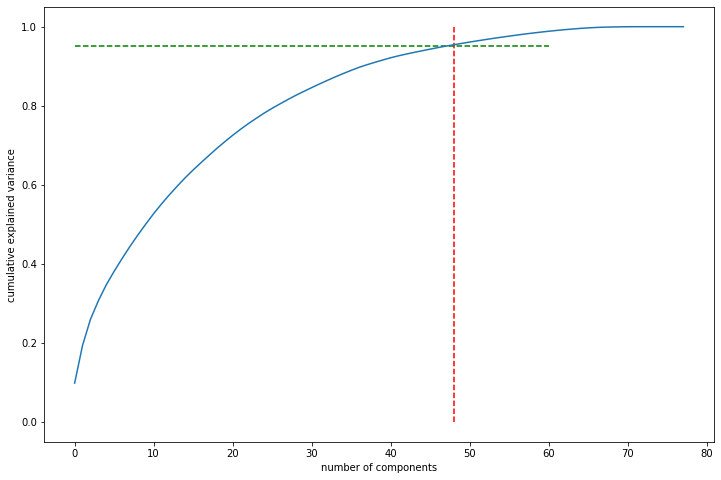

,PC1,PC2,PC3,Feature
0,0.11,0.28,0.11,arpu_8
1,0.14,0.07,0.18,onnet_mou_8
2,0.17,0.14,0.12,offnet_mou_8
3,0.03,0.04,0.00,roam_ic_mou_8
4,0.05,0.06,0.03,roam_og_mou_8
5,0.07,0.08,0.02,loc_og_t2t_mou_8
6,0.11,0.14,-0.05,loc_og_t2m_mou_8
7,0.05,0.09,-0.12,loc_og_t2f_mou_8
8,0.01,0.02,0.08,loc_og_t2c_mou_8
9,0.12,0.03,0.19,std_og_t2t_mou_8


In [85]:
pca = scree_plot(X_scaled) # scree plot

col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [86]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  9.85,  19.37,  25.97,  30.67,  34.7 ,  38.13,  41.34,  44.42,
        47.31,  50.07,  52.72,  55.19,  57.51,  59.7 ,  61.82,  63.78,
        65.64,  67.45,  69.24,  70.92,  72.55,  74.08,  75.52,  76.87,
        78.19,  79.39,  80.52,  81.62,  82.68,  83.66,  84.62,  85.56,
        86.47,  87.36,  88.2 ,  89.  ,  89.77,  90.43,  91.04,  91.63,
        92.2 ,  92.69,  93.14,  93.56,  93.97,  94.37,  94.76,  95.13,
        95.48,  95.82,  96.16,  96.48,  96.79,  97.1 ,  97.38,  97.66,
        97.93,  98.2 ,  98.44,  98.68,  98.9 ,  99.1 ,  99.29,  99.46,
        99.62,  99.75,  99.86,  99.94,  99.98, 100.02, 100.04, 100.05,
       100.05, 100.05, 100.05, 100.05, 100.05, 100.05])

**Analysis:**
> Looks like 48 components are enough to describe 95% of the variance in the dataset.We'll choose **48** components for our modeling

In [87]:
x_train, x_test, y_train, y_test = resampling_dataset(X_scaled,Y,48)

Shape of train datatset before : (20967, 78) 
Percenatge of Churned customer data : 8.12 
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE :  (38528, 78)
Shape of train datatset after PCA : (38528, 48) 


**Analysis:**
> SMOTE bloated the dataset and balanced it by adding skewed data values.

>#### Define some user define function modelling so avoid repetation of code

In [88]:
def prepare_data_for_regression(df):
    X,Y=split_dataset(df)
    x_train, x_test, y_train, y_test = resampling_dataset(scale_dataset(X),Y,48)
    return x_train, x_test, y_train, y_test


consolidate_summary = pd.DataFrame()

def print_plot_confusion_matrix(cm): # prints and plots the confusion matrix.
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def print_model_metrics(y_test,y_pred,model_name):
    print(model_name)
    print(" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    print_plot_confusion_matrix(cp)
    plt.show()
    
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    add_to_summary(df)
    return df 

def add_to_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

>### Logistic Regression Modelling

In [89]:
#Training the model on the train data
x_tr, x_tst, y_tr, y_tst = train_test_split(X_scaled, Y, test_size=0.7, train_size=0.3, random_state=100)

lr = LogisticRegression()
model = RFE(lr, 30)             # running RFE with 25 variables as output
model = model.fit(x_tr, y_tr)


In [90]:
# Making predictions
predictions = model.predict(x_tst)

Logistic Regression
 Model Stats Scores Summary : 


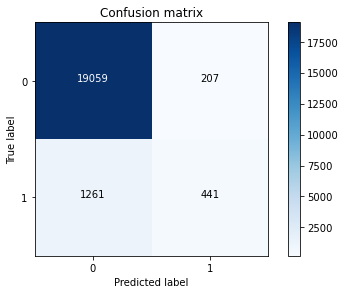

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression,0.93,0.26,0.68,0.62,0.38


In [91]:
print_model_metrics(y_tst, predictions ,'Logistic Regression')

In [92]:
x_tr

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_amt_data_8,good_phase_total_avg_rech_amnt,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
20996,-0.19,-0.17,0.54,-0.17,-0.19,-0.17,-0.31,-0.30,0.21,-0.08,0.87,-0.15,-0.04,-0.16,-0.02,0.01,0.11,-0.26,0.27,-0.21,-0.10,1.39,-0.16,-0.10,0.54,-0.27,-0.55,-0.43,-0.54,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.75,-0.40,-0.29,-0.40,-0.09,-0.06,0.50,-0.22,-0.25,-0.21,-0.13,-0.30,-0.27,0.07,0.72,-0.16,-0.05,-0.33,-0.14,-0.11,0.33,-0.32,1.04,-0.25,-0.15,-0.27,-0.15,-0.10,0.31,-0.10,-0.34,-0.37,-0.65,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.43,-0.40
11889,0.31,-0.39,0.20,-0.17,-0.19,-0.10,0.84,0.38,-0.24,-0.37,-0.38,6.35,-0.04,-0.29,-0.02,-0.13,-0.16,-0.19,-0.19,-0.26,1.29,-0.24,-0.16,-0.10,-0.86,-0.14,0.52,1.08,-0.54,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,2.55,-0.40,-0.29,-0.11,0.62,-0.18,0.70,-0.22,-0.25,0.45,1.58,1.98,-0.27,-0.44,-0.46,10.11,-0.05,-0.37,-0.14,-0.06,0.22,-0.18,-0.20,-0.31,2.45,-0.27,-0.15,-0.10,-0.79,0.66,0.51,1.29,-0.65,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.43,-0.40
5687,-1.01,-0.51,-0.69,-0.17,-0.19,-0.34,-0.65,-0.30,-0.24,-0.37,-0.38,-0.15,-0.04,-0.29,-0.02,-0.39,3.53,-0.28,-0.19,-0.27,-0.13,-0.24,-0.16,-0.10,-0.97,-0.96,-0.92,-0.64,-0.54,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.68,0.07,-0.29,-0.03,-0.93,-0.59,-0.76,-0.22,-0.25,-0.37,-0.65,-0.30,0.71,-0.44,-0.45,-0.16,-0.05,0.20,0.05,-0.42,-0.67,-0.34,-0.20,-0.31,-0.15,-0.27,-0.12,-0.10,-0.90,-0.94,-0.22,0.31,0.27,0.28,-0.15,-0.32,0.83,0.36,-0.39,-0.23,0.55,0.36
27242,-1.01,-0.51,-0.70,-0.17,-0.19,-0.34,-0.65,-0.30,-0.24,-0.37,-0.38,-0.15,-0.04,-0.32,-0.02,-0.39,-0.68,-0.33,-0.19,-0.27,-0.13,-0.24,-0.16,-0.10,-0.75,-0.96,-0.92,-0.64,-0.54,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.76,-0.40,-0.29,-0.46,-0.22,-0.01,0.84,-0.10,-0.08,0.31,-0.36,-0.30,-0.27,-0.17,1.23,-0.16,-0.04,-0.37,-0.14,0.15,-0.10,-0.34,0.15,0.43,-0.12,-0.27,0.27,-0.10,-0.61,-0.25,-0.39,-0.65,-0.65,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.43,-0.40
5907,-1.01,-0.51,-0.70,-0.17,-0.19,-0.34,-0.65,-0.30,-0.24,-0.37,-0.38,-0.15,-0.04,-0.32,-0.02,-0.39,-0.68,-0.33,-0.19,-0.27,-0.13,-0.24,-0.16,-0.10,-1.08,-0.96,-0.92,-0.64,-0.54,-0.62,-0.34,-0.38,-0.38,-0.42,-0.34,-0.18,-0.98,-0.40,-0.29,0.21,1.60,-0.38,0.90,-0.22,-0.25,0.06,2.43,0.06,-0.27,-0.44,-0.34,0.02,-0.05,-0.13,1.04,0.60,5.69,0.05,-0.20,0.28,0.10,-0.27,-0.15,-0.07,0.95,1.52,0.03,-0.44,-0.65,-0.74,-0.42,-0.43,-0.46,-0.47,-0.39,-0.23,-0.43,-0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [94]:
print(model.support_)
print(model.ranking_)
f = model.get_support(1) #the most important features
X = x_tr[x_tr.columns[f]]


[False False  True False False  True  True False False  True False False
  True False  True  True  True  True  True  True False  True False False
  True False False  True  True False  True False  True False  True False
  True  True  True False  True False  True False False False  True False
 False False  True False False False False  True  True False  True False
 False False False False False False False False False False False False
  True False False False  True False]
[18 34  1 16 17  1  1 47 23  1 33  3  1 24  1  1  1  1  1  1 40  1  7 26
  1 49 28  1  1 38  1 48  1  9  1 10  1  1  1  5  1 15  1 13 42  4  1 27
 22 14  1 46 44 41 29  1  1 21  1 32 35 20  8 31 30 19 12 37 25  6  2 36
  1 45 39 11  1 43]


In [95]:
f

array([ 2,  5,  6,  9, 12, 14, 15, 16, 17, 18, 19, 21, 24, 27, 28, 30, 32,
       34, 36, 37, 38, 40, 42, 46, 50, 55, 56, 58, 72, 76], dtype=int64)

In [96]:
X.columns

Index(['offnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'isd_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'monthly_3g_8', 'aon', 'vbc_3g_8',
       'total_rech_amt_data_8', 'avg_arpu_av67', 'avg_offnet_mou_av67',
       'avg_loc_og_t2m_mou_av67', 'avg_std_og_t2m_mou_av67',
       'avg_loc_ic_t2t_mou_av67', 'avg_loc_ic_t2m_mou_av67',
       'avg_std_ic_t2t_mou_av67', 'avg_monthly_2g_av67', 'avg_vbc_3g_av67'],
      dtype='object')

In [98]:
rfe_scores = pd.DataFrame(list(zip(X_scaled.columns,model.support_,model.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [99]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [100]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_tr, y_tr) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    5.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
25,500,-0.15,-0.15,2
24,100,-0.15,-0.15,3
23,50,-0.15,-0.15,4
22,20,-0.15,-0.15,5
21,10.00,-0.15,-0.15,6
20,9.00,-0.15,-0.15,7
19,8.00,-0.15,-0.15,8
18,7.00,-0.15,-0.15,9
17,6.00,-0.15,-0.15,10
16,5.00,-0.15,-0.15,11


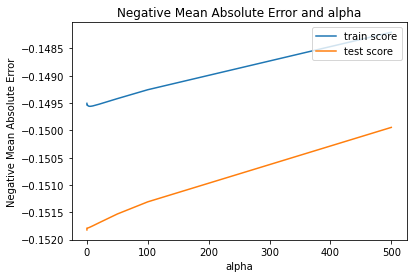

In [102]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [103]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=1000)

In [105]:
# check the coefficient values with lambda = 1000

alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(x_tr, y_tr)
ridge.coef_

array([-0.02340802, -0.01217316, -0.01196116, -0.0046997 ,  0.00893115,
       -0.00644898, -0.00866462, -0.0019193 ,  0.00528456, -0.01116801,
       -0.00880942, -0.00254335, -0.00614485, -0.0076623 , -0.00023355,
       -0.01557629, -0.02473691, -0.00579988, -0.01080915, -0.01056204,
       -0.00266836, -0.01676407, -0.00499747, -0.00072192, -0.02666376,
       -0.01198965, -0.01235595, -0.01335416, -0.01429789, -0.01182028,
       -0.00830279,  0.00180469, -0.00809697, -0.01257506, -0.00535156,
       -0.00395528, -0.01763112, -0.01053761,  0.01481292,  0.00402419,
        0.02105753,  0.00711362,  0.00970877,  0.0126721 ,  0.01205653,
        0.00251419, -0.00572385, -0.0044814 , -0.0067552 ,  0.0085395 ,
        0.01026658, -0.0015324 ,  0.00493447,  0.00360705, -0.00095606,
        0.00475603,  0.01173313,  0.00506675,  0.00895754,  0.00343019,
        0.00104042,  0.00437017,  0.00645183,  0.00078823,  0.01065521,
        0.01462186,  0.01737442, -0.00355217,  0.00231787, -0.00

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred_train = ridge.predict(x_tr)
print(r2_score(y_tr,y_pred_train))

y_pred_test = ridge.predict(x_tst)
print(r2_score(y_tst,y_pred_test))

0.15729883551475332
0.15991855050367432


In [110]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = x_tr.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,arpu_8,0.08
41,avg_onnet_mou_av67,0.02
67,avg_last_day_rch_amt_av67,0.02
39,good_phase_total_avg_rech_amnt,0.01
66,avg_max_rech_amt_av67,0.01
44,avg_roam_og_mou_av67,0.01
45,avg_loc_og_t2t_mou_av67,0.01
57,avg_loc_ic_t2f_mou_av67,0.01
71,avg_vol_3g_mb_av67,0.01
65,avg_total_rech_amt_av67,0.01


In [111]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':x_tr.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,arpu_8,-0.02
1,onnet_mou_8,-0.01
2,offnet_mou_8,-0.01
3,roam_ic_mou_8,-0.00
4,roam_og_mou_8,0.01
...,...,...
73,avg_sachet_2g_av67,0.00
74,avg_monthly_3g_av67,0.00
75,avg_sachet_3g_av67,0.01
76,avg_vbc_3g_av67,0.00


In [112]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = x_tr.columns))
ridge_coeff_dict

{'arpu_8': -0.0234,
 'onnet_mou_8': -0.0122,
 'offnet_mou_8': -0.012,
 'roam_ic_mou_8': -0.0047,
 'roam_og_mou_8': 0.0089,
 'loc_og_t2t_mou_8': -0.0064,
 'loc_og_t2m_mou_8': -0.0087,
 'loc_og_t2f_mou_8': -0.0019,
 'loc_og_t2c_mou_8': 0.0053,
 'std_og_t2t_mou_8': -0.0112,
 'std_og_t2m_mou_8': -0.0088,
 'std_og_t2f_mou_8': -0.0025,
 'isd_og_mou_8': -0.0061,
 'spl_og_mou_8': -0.0077,
 'og_others_8': -0.0002,
 'loc_ic_t2t_mou_8': -0.0156,
 'loc_ic_t2m_mou_8': -0.0247,
 'loc_ic_t2f_mou_8': -0.0058,
 'std_ic_t2t_mou_8': -0.0108,
 'std_ic_t2m_mou_8': -0.0106,
 'std_ic_t2f_mou_8': -0.0027,
 'spl_ic_mou_8': -0.0168,
 'isd_ic_mou_8': -0.005,
 'ic_others_8': -0.0007,
 'total_rech_num_8': -0.0267,
 'total_rech_amt_8': -0.012,
 'max_rech_amt_8': -0.0124,
 'last_day_rch_amt_8': -0.0134,
 'total_rech_data_8': -0.0143,
 'av_rech_amt_data_8': -0.0118,
 'vol_2g_mb_8': -0.0083,
 'vol_3g_mb_8': 0.0018,
 'monthly_2g_8': -0.0081,
 'sachet_2g_8': -0.0126,
 'monthly_3g_8': -0.0054,
 'sachet_3g_8': -0.004,
 'a

In [114]:
# Do an RFE to minimise the features to 15
X_train_ridge = x_tr[ridge_df.Features]

lm = LogisticRegression()
lm.fit(X_train_ridge, y_tr)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_tr)

In [115]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
14,avg_loc_ic_t2m_mou_av67,True,1,0.01
12,avg_std_og_t2m_mou_av67,True,1,0.01
10,avg_offnet_mou_av67,True,1,0.01
13,avg_loc_ic_t2t_mou_av67,True,1,0.00
1,og_others_8,True,1,-0.00
11,avg_loc_og_t2m_mou_av67,True,1,-0.01
4,loc_ic_t2f_mou_8,True,1,-0.01
9,vbc_3g_8,True,1,-0.01
0,offnet_mou_8,True,1,-0.01
7,last_day_rch_amt_8,True,1,-0.01


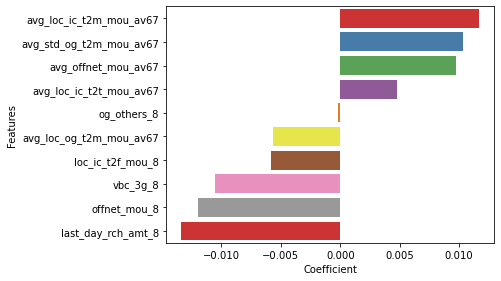

In [116]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

### Tree Model Regression 

> Let's first fit a random forest model with default hyperparameters.

In [117]:
tree_df = final_data.copy()

In [118]:
x_train, x_test, y_train, y_test = prepare_data_for_regression(tree_df)

Shape of train datatset before : (20967, 78) 
Percenatge of Churned customer data : 8.12 
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE :  (38528, 78)
Shape of train datatset after PCA : (38528, 48) 


In [119]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [120]:
rfc = RandomForestClassifier() #initialise
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [121]:
# Making predictions
predictions = rfc.predict(x_test)

RandomForest (Default)
 Model Stats Scores Summary : 


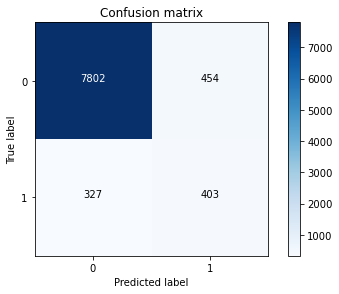

,Model,Accuracy,Precision,Recall,AUC,F1
0,RandomForest (Default),0.91,0.55,0.47,0.75,0.51


In [122]:
print_model_metrics(y_test,predictions,"RandomForest (Default)")

> ### Hyperparameter Tuning for RF model

In [123]:
def tune_hyperparameter(parameters,x_train,y_train,n_folds = 5,max_depth=0):
    
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(x_train, y_train)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

>**Tuning max_depth**

>Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

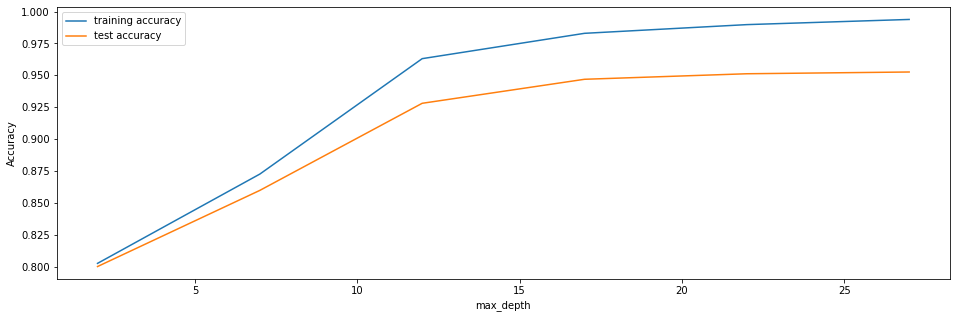

In [124]:
# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}
tune_hyperparameter(parameters,x_train,y_train)

**Analysis:** 
> We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score becomme stagnant. The ensemble tries to overfit as we increase the max_depth. Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest. **12 and 18** value have peek convergens and can be used for grid veiw search.

> #### Tuning n_estimators
- Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.


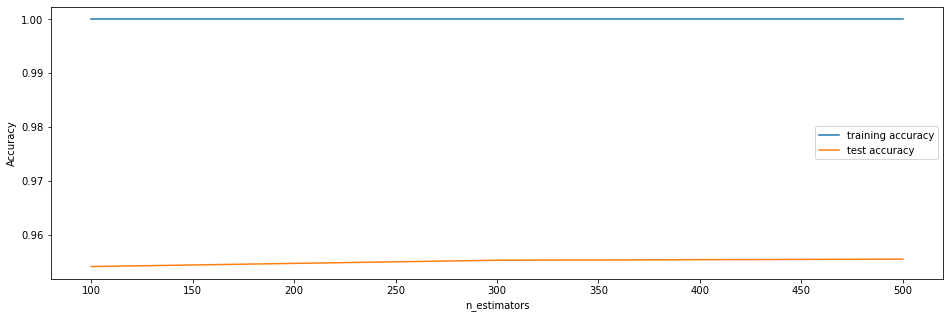

In [125]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 600, 200)}
tune_hyperparameter(parameters,x_train,y_train)

**Analysis:** 
> Score almost remain the same with very low dip throught the range. We wull use **300** for grid view search.

> #### Tuning max_features
- Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

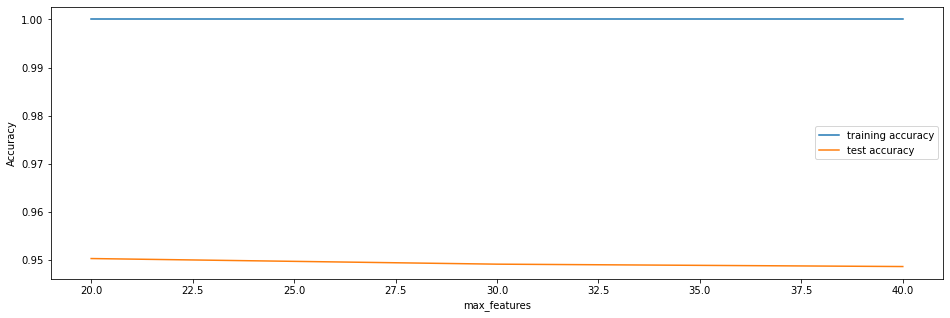

In [126]:
# parameters to build the model on
parameters = {'max_features': [20,30,40,50]}
tune_hyperparameter(parameters,x_train,y_train,4)

**Analysis:** 
>Apparently, accuracy of training seems to be stable and test scores seems to decrease till **30** and then almost all same. 

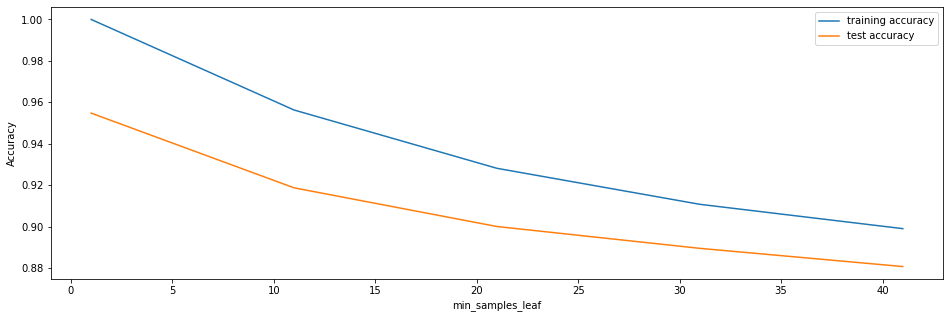

In [127]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 50, 10)}
tune_hyperparameter(parameters,x_train,y_train)

**Analysis:** 
> We can see that the model starts to overfit as value is decrease the value of min_samples_leaf. **10 to 20** seems to be a good range and that will be used in grid search.

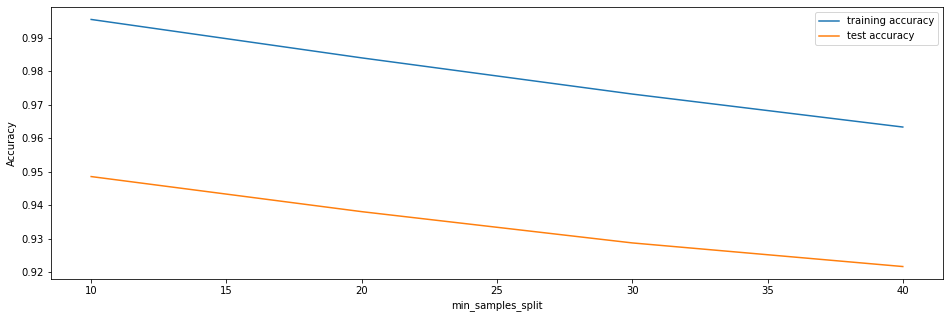

In [128]:
# parameters to build the model on
parameters = {'min_samples_split': range(10, 50, 10)}
tune_hyperparameter(parameters,x_train,y_train)

**Analysis:** 
> Range **10 to 30** is optimal with good accuracy. 

> #### Grid Search to Find Optimal Hyperparameters
>> - We can now find the optimal hyperparameters using GridSearchCV.

In [129]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12,18],
    'n_estimators': [200],
    'max_features': [40],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [130]:
# Fit the grid search to the data
rf_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 89.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 126.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [12, 18], 'max_features': [40],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [200]},
             return_train_score=True, verbose=1)

In [131]:
# printing the optimal accuracy score and hyperparameters
print("We can get accuracy of {0} " .format(str(round(rf_grid_search.best_score_,2))))
print(" using {0} " .format(str(rf_grid_search.best_params_)))


We can get accuracy of 0.92 
 using {'max_depth': 18, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200} 


In [132]:
print("Max accuracy with Random Forest classifier - {0} " .format(str(round(rf_grid_search.best_score_,2))))


Max accuracy with Random Forest classifier - 0.92 


> ### Building and Evaluating the Final Model for Random Forest
- Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [133]:
rfc = RandomForestClassifier(max_depth=18,
                             max_features=40,
                             min_samples_leaf=10,
                             min_samples_split=10,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=18, max_features=40, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200, n_jobs=-1)

In [134]:
# Making predictions
predictions = rfc.predict(x_test)

RandomForest (Hyper)
 Model Stats Scores Summary : 


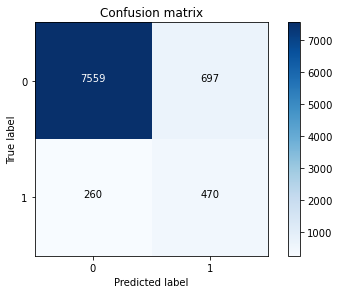

,Model,Accuracy,Precision,Recall,AUC,F1
0,RandomForest (Hyper),0.89,0.64,0.40,0.78,0.50


In [135]:
# Printing confusion matrix
print_model_metrics(y_test,predictions,'RandomForest (Hyper)')

In [136]:
consolidate_summary.head(10)

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression,0.93,0.26,0.68,0.62,0.38
1,RandomForest (Default),0.91,0.55,0.47,0.75,0.51
2,RandomForest (Hyper),0.89,0.64,0.40,0.78,0.50


# Recommendations

> ### Business Insights 
>> - Top Feature are:
       'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_8', 'std_ic_t2t_mou_8', 'ic_others_8',
       'last_day_rch_amt_8', 'vol_3g_mb_8', 'sachet_2g_8', 'monthly_3g_8',
       'aon', 'vbc_3g_8', 'total_rech_amt_data_8', 'avg_arpu_av67',
       'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67',
       'avg_loc_og_t2t_mou_av67'
>> -  Less number of **high value customer** are churing but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.
>> - Customers with less than **4 years** of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group. 
>> - **Average revenue per user** seems to be most important feature in determining churn prediction. 
>> - **Incoming** and **Outgoing Calls** on **romaing** for 8th month are strong indicators of churn behaviour
>> - **Local Outgoing calls** made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.  
>> -  Better 2G/3G area coverage are good, whereas 2G/3G services are not good then it's strong indicator of churn behaviour.


> ### Model Summary 
>> - **Logistic Regression Accuracy :** Accuracy:0.93	Precision:0.26	Recall:0.68	AUC:0.62	F1:0.38 				
>> - **Random forest**  produce good accuracy with 0.91 (default overfit model) and 0.89 with tuned hyperparameters.
>> - **As per our analysis Logistic Regression produce best accuracy but Precision is very low whereas Random forest have excellent accuracy and good Precision score, so Random forest models can be selected to predict churn data for future dataset or production.**

---



---
# Optional Model
- Let's Understand and see the same dataset in XGBoost/SVM model, and watch the differece. Because as we had already studied these model let's implement this with real data. In this Case Study I am going to use XGBoost(Defaul and with Tune Hyperparameters) and SVM (Default and with tuned Hyperparameters) As Optional to check our knowledge.


## Extra Model - 1 : XGBoost
Let's  try XGBoost. The hyperparameters are the same, some important ones being ```subsample```, ```learning_rate```, ```max_depth``` etc.

In [137]:
xgboost_df = final_data.copy()
x_train, x_test, y_train, y_test = prepare_data_for_regression(xgboost_df)

Shape of train datatset before : (20967, 78) 
Percenatge of Churned customer data : 8.12 
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE :  (38528, 78)
Shape of train datatset after PCA : (38528, 48) 


In [138]:
# fit model on training data with default hyperparameters
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

[13:30:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
# evaluate predictions
y_pred = model_xgb.predict(x_test)

XGBoost (Default)
 Model Stats Scores Summary : 


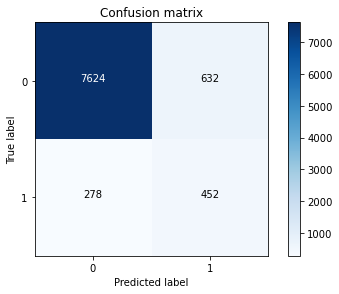

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost (Default),0.90,0.62,0.42,0.77,0.50


In [140]:
print_model_metrics(y_test, y_pred ,'XGBoost (Default)')

**Analysis:** 
> The roc_auc in this case is about 77% with default hyperparameters.

>Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [141]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      


In [142]:
# fit the model
model_cv.fit(x_train, y_train)      

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.8min finished


[13:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [143]:
# cv results
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [144]:
# printing the optimal accuracy score and hyperparameters
print("We can get accuracy of {0} " .format(str(round(model_cv.best_score_,2))))
print("using {0} " .format(str(model_cv.best_params_)))

We can get accuracy of 0.88 
using {'learning_rate': 0.3, 'subsample': 0.4} 


In [145]:
def plot_for_xboost(param_grid,cv_results):
    plt.figure(figsize=(18,5))
    for n, subsample in enumerate(param_grid['subsample']):
        # subplot 1/n
        plt.subplot(1,len(param_grid['subsample']), n+1)
        df = cv_results[cv_results['param_subsample']==subsample]

        plt.plot(df["param_learning_rate"], df["mean_test_score"])
        plt.plot(df["param_learning_rate"], df["mean_train_score"])
        plt.xlabel('learning_rate')
        plt.ylabel('AUC')
        plt.title("subsample={0}".format(subsample))
        plt.ylim([0.60, 1])
        plt.legend(['test score', 'train score'], loc='right left')
        plt.xscale('log')

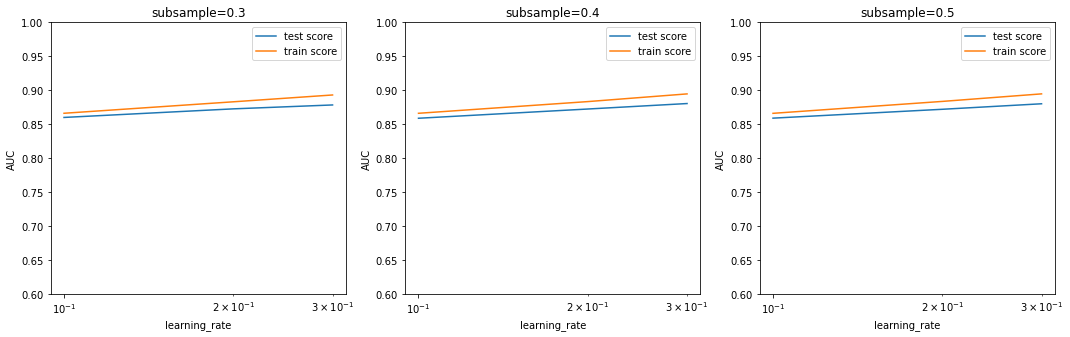

In [146]:
param_grid1 = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5]}  
plot_for_xboost(param_grid1,cv_results_xboost)


**Analysis:** 
> The results show that a subsample size of **0.5** and learning_rate of about **0.3** seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 

> Let's build a final model with the chosen hyperparameters.

In [147]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params,max_depth=2, n_estimators=200)
model.fit(x_train, y_train)

[13:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1,
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.5},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [148]:
# predict
y_pred = model.predict(x_test)

XGBoost (Hyper Tuned)
 Model Stats Scores Summary : 


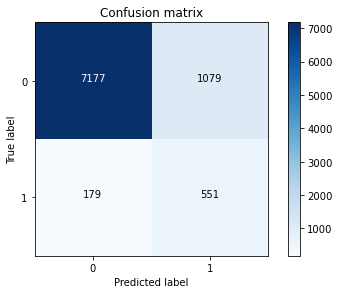

,Model,Accuracy,Precision,Recall,AUC,F1
0,XGBoost (Hyper Tuned),0.86,0.75,0.34,0.81,0.47


In [149]:
print_model_metrics(y_test, y_pred,'XGBoost (Hyper Tuned)')

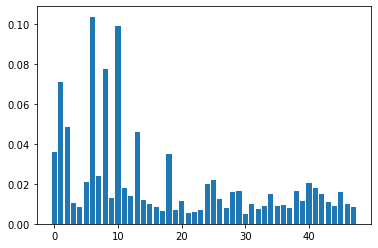

In [150]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

Important features ...


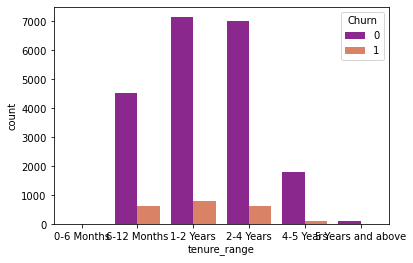

,PC1,PC2,PC3,Feature
0,0.11,0.28,0.11,arpu_8
1,0.14,0.07,0.18,onnet_mou_8
2,0.17,0.14,0.12,offnet_mou_8
3,0.03,0.04,0.00,roam_ic_mou_8
4,0.05,0.06,0.03,roam_og_mou_8
5,0.07,0.08,0.02,loc_og_t2t_mou_8
6,0.11,0.14,-0.05,loc_og_t2m_mou_8
7,0.05,0.09,-0.12,loc_og_t2f_mou_8
8,0.01,0.02,0.08,loc_og_t2c_mou_8
9,0.12,0.03,0.19,std_og_t2t_mou_8


In [151]:
print("Important features ...")
plt.figure(figsize=(6,4))
sns.countplot(x = 'tenure_range', hue = 'Churn',data = tenure_analysis_data,palette=("plasma"))
plt.show()


col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

In [152]:
consolidate_summary.head(10)

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression,0.93,0.26,0.68,0.62,0.38
1,RandomForest (Default),0.91,0.55,0.47,0.75,0.51
2,RandomForest (Hyper),0.89,0.64,0.40,0.78,0.50
3,XGBoost (Default),0.90,0.62,0.42,0.77,0.50
4,XGBoost (Hyper Tuned),0.86,0.75,0.34,0.81,0.47


## Extra Model - 2: SVM

In [153]:
    
def svm_model_stats(x_train, x_test, y_train, y_test,kernel): 
    model = svm.SVC(kernel=kernel) # build model
    model.fit(x_train, y_train) # fit model
    predictions = model.predict(x_test) # print
    accuracy_score = round(metrics.accuracy_score(y_true=y_test, y_pred=predictions),2)
    print("Model selected - ")
    print(kernel.upper())
    print(" and accuracy score for kernal is ") 
    print((accuracy_score*100))
    model_name = "SVM (Default)-"+kernel
    print_model_metrics(y_test,predictions,model_name)
    
def hyper_stats(cv_results,param_value):
    gamma = cv_results[cv_results['param_gamma']==param_value]
    plt.plot(gamma["param_C"], gamma["mean_test_score"])
    plt.plot(gamma["param_C"], gamma["mean_train_score"])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Gamma="+str(param_value))
    plt.ylim([0.60, 1])
    plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
    plt.xscale('log')  
    

>### SVM Regression Modelling

> Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [154]:
svm_df = final_data.copy()
x_train, x_test, y_train, y_test = prepare_data_for_regression(svm_df)


Shape of train datatset before : (20967, 78) 
Percenatge of Churned customer data : 8.12 
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE :  (38528, 78)
Shape of train datatset after PCA : (38528, 48) 


Model selected - 
LINEAR
 and accuracy score for kernal is 
84.0
SVM (Default)-linear
 Model Stats Scores Summary : 


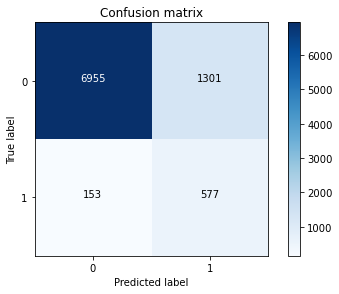

In [155]:
svm_model_stats(x_train, x_test, y_train, y_test,"linear")

Model selected - 
RBF
 and accuracy score for kernal is 
87.0
SVM (Default)-rbf
 Model Stats Scores Summary : 


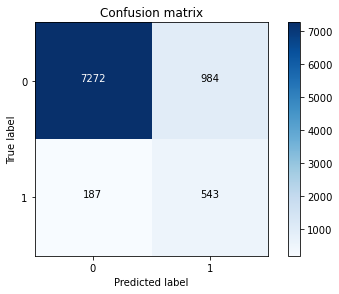

In [156]:
svm_model_stats(x_train,x_test, y_train, y_test,"rbf")

**Analysis:** 
> The non-linear model gives approx. 87% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

> ### Grid Search: Hyperparameter Tuning
- Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [157]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1,1e-2, 1e-3], 'C': [1, 10, 100]}]

# specify model
model = svm.SVC(kernel="rbf")

# set up GridSearchCV()
model_svm = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_svm.fit(x_train, y_train)  

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 46.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

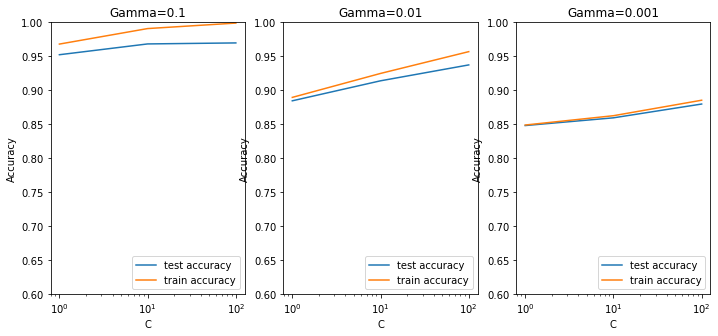

In [158]:
# results
svm_results = pd.DataFrame(model_svm.cv_results_)
svm_results['param_C'] = svm_results['param_C'].astype('int')
gamma=[1e-1,1e-2, 1e-3]
plt.figure(figsize=(16,5))
plt.subplot(141)
hyper_stats(svm_results,gamma[0])
plt.subplot(142)
hyper_stats(svm_results,gamma[1])
plt.subplot(143)
hyper_stats(svm_results,gamma[2])

plt.show()

**Analysis:** 
> The plots above show some useful insights:
>> - Looking at above curves and values , model with gamma=0.1 seems to be overfitting and should not be used.
>> -  Model selected with best value as 'C': 100, 'gamma': 0.1 but this model also seems to be overfitting
>> -  But model selected with value 'C': 10, 'gamma': 0.1 should produce better results.
>> -  We will be selecting these values for final modelling.

> ### Building and Evaluating the Final Model
- Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

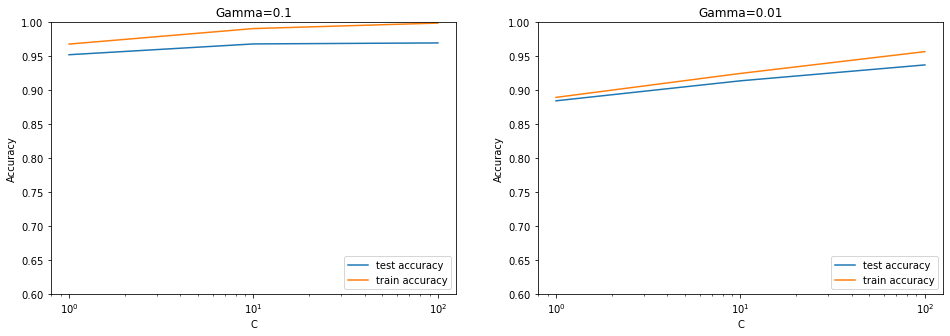

In [159]:
plt.figure(figsize=(16,5))
plt.subplot(121)
hyper_stats(svm_results,gamma[0])
plt.subplot(122)
hyper_stats(svm_results,gamma[1])

**Analysis:**
> The plots above show some useful insights:
>> - Non-linear models (high gamma) perform *much better* than the linear ones
>> - At any value of gamma, a high value of C leads to better performance
>> - Model with gamma = 0.1 tends to overfit and rest of the values seems to be good. 
>> - This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

In [160]:
# printing the optimal accuracy score and hyperparameters
best_score = model_svm.best_score_
best_hyperparams = model_svm.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(round(best_score,2), best_hyperparams))

The best test score is 0.97 corresponding to hyperparameters {'C': 100, 'gamma': 0.1}


In [161]:
# model with optimal hyperparameters
final_svm_model = svm.SVC(C=10, gamma=0.1, kernel="rbf")

final_svm_model.fit(x_train, y_train)
y_pred = final_svm_model.predict(x_test)

# metrics
print("Max accuracy with SVM (rbf) is ")
print(str(round(metrics.accuracy_score(y_test, y_pred),2)))

Max accuracy with SVM (rbf) is 
0.91


SVM( rfb ) [Hyper]
 Model Stats Scores Summary : 


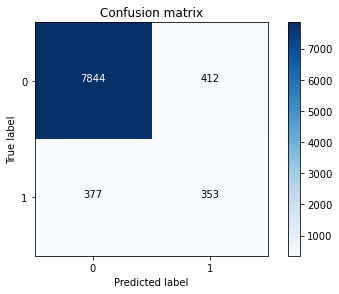

,Model,Accuracy,Precision,Recall,AUC,F1
0,SVM( rfb ) [Hyper],0.91,0.48,0.46,0.72,0.47


In [162]:
print_model_metrics(y_test, y_pred,"SVM( rfb ) [Hyper]")

In [163]:
consolidate_summary.head(10)

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression,0.93,0.26,0.68,0.62,0.38
1,RandomForest (Default),0.91,0.55,0.47,0.75,0.51
2,RandomForest (Hyper),0.89,0.64,0.40,0.78,0.50
3,XGBoost (Default),0.90,0.62,0.42,0.77,0.50
4,XGBoost (Hyper Tuned),0.86,0.75,0.34,0.81,0.47
5,SVM (Default)-linear,0.84,0.79,0.31,0.82,0.44
6,SVM (Default)-rbf,0.87,0.74,0.36,0.81,0.48
7,SVM( rfb ) [Hyper],0.91,0.48,0.46,0.72,0.47


>> - **XGBoost**  produce apt accuracy of 0.90 (default overfit model) and 0.86 with tuned hyperparameters.
>> - **SVM** with tuned hyperparameters produce best result on this dataset with 0.91 accuracy.
>> - **As per our analysis SVM and Random forest produce best accuracy and models can be selected to predict churn data for future dataset or production.**